In [1]:
import imutils
import numpy as np
from matplotlib import pyplot as plt
import os
from skimage.transform import hough_ellipse
import cv2
import pandas as pd

In [2]:
file_names = os.listdir("images")
file_names = ["images\{}".format(name) for name in file_names]

cb_images =list()
cropped_images= list()
original_images = list()
for file_name in file_names:
    image = cv2.imread(file_name)
    cropped_image= image[40:550,130:650]
    cropped_image[0:30,0:30]= 0
    cropped_images.append(cropped_image.copy())
    blurred_image = cv2.GaussianBlur(cropped_image,(13,13),0)
    cb_images.append(blurred_image)
    

In [3]:
def find_best_circle(img):
    circles = cv2.HoughCircles(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY), cv2.HOUGH_GRADIENT,2.0,minDist=190,
                                    param1=104,param2=400,minRadius=220,maxRadius=250)

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        return circles

image 0 has 1 circles
center has coordinate (253,243), radius = 232


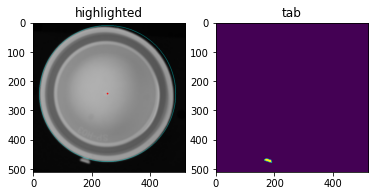

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   207  66.041631     464     164     478     190        364          226   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          27.929403           9.872963      0.935436      1    21.070034   

   rectangularity  
0        0.568681  
label 1.0
best blob has label 1.0


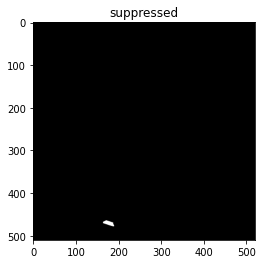

##################################################
image 1 has 1 circles
center has coordinate (251,243), radius = 230


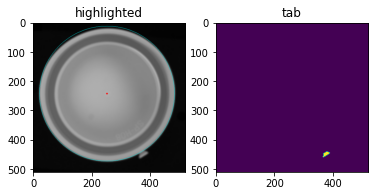

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   247  71.012193     439     363     460     387        504          280   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          26.621407          12.788533      0.877058      1    20.415917   

   rectangularity  
0        0.490079  
label 1.0
best blob has label 1.0


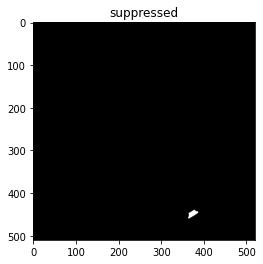

##################################################
image 2 has 1 circles
center has coordinate (247,243), radius = 223


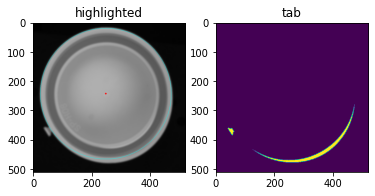

labels =[0 1 2 3 4 5]
There are 6 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
2   261  73.426407     360      40     385      62        550          299   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
2          26.348404          14.207638      0.842164      3    20.656848   

   rectangularity  
2        0.474545  
label 3.0
best blob has label 3.0


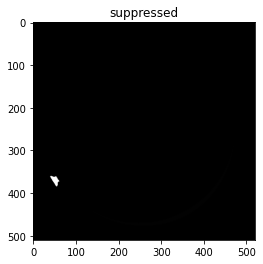

##################################################
image 3 has 1 circles
center has coordinate (251,247), radius = 229


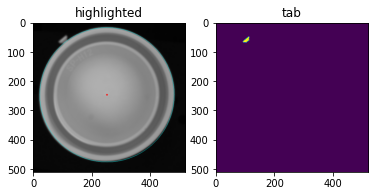

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   227  66.426407      49      91      70     113        462          247   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          26.605755          11.729207       0.89758      1    19.438183   

   rectangularity  
0        0.491342  
label 1.0
best blob has label 1.0


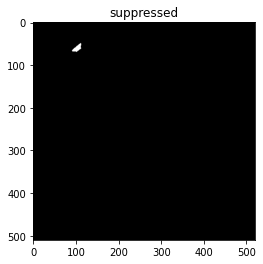

##################################################
image 4 has 1 circles
center has coordinate (255,247), radius = 229


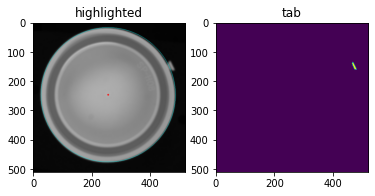

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   157  64.941125     136     462     162     478        416          180   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          29.776941           6.918182      0.972636      1    26.862101   

   rectangularity  
0        0.377404  
label 1.0
best blob has label 1.0


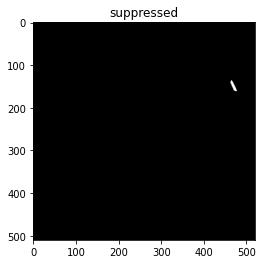

##################################################
image 5 has 1 circles
center has coordinate (255,251), radius = 228


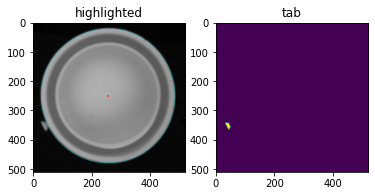

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   228  67.355339     341      32     366      50        450          257   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          26.052972          11.907376      0.889444      1     19.89799   

   rectangularity  
0        0.506667  
label 1.0
best blob has label 1.0


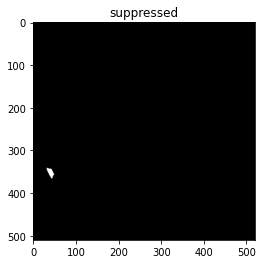

##################################################
image 6 has 1 circles
center has coordinate (259,249), radius = 228


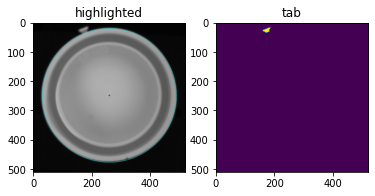

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   255  72.769553      18     159      37     185        494          295   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          25.839475          14.108067      0.837792      1    20.766305   

   rectangularity  
0        0.516194  
label 1.0
best blob has label 1.0


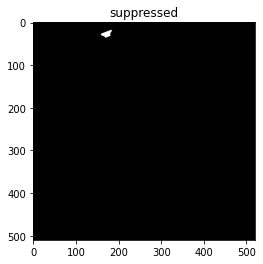

##################################################
image 7 has 1 circles
center has coordinate (249,249), radius = 230


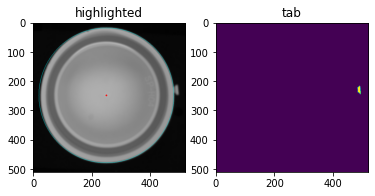

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   215   65.79899     217     481     245     492        308          238   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          27.677592          10.561449      0.924332      1    20.137242   

   rectangularity  
0        0.698052  
label 1.0
best blob has label 1.0


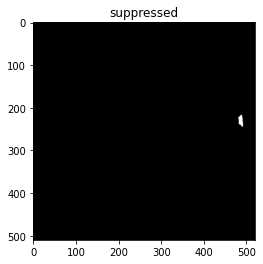

##################################################
image 8 has 1 circles
center has coordinate (247,245), radius = 229


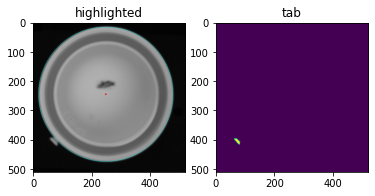

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   202  63.426407     395      61     417      82        462          221   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          27.344462           9.903564      0.932109      1    19.915392   

   rectangularity  
0        0.437229  
label 1.0
best blob has label 1.0


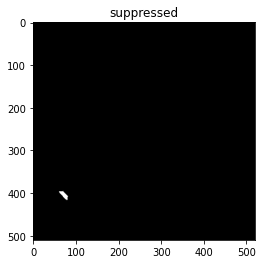

##################################################
image 9 has 1 circles
center has coordinate (253,245), radius = 229


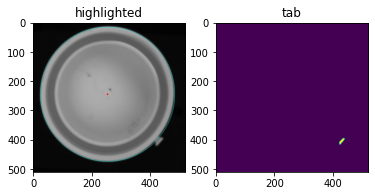

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   186  61.012193     395     419     417     438        418          200   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          28.081327           8.735289      0.950387      1    20.013375   

   rectangularity  
0        0.444976  
label 1.0
best blob has label 1.0


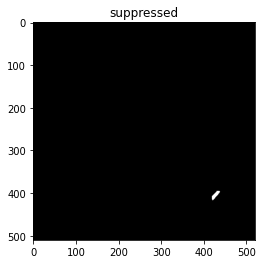

##################################################
image 10 has 1 circles
center has coordinate (247,249), radius = 228


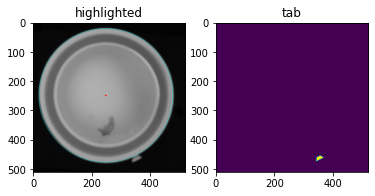

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   247  70.355339     453     340     473     364        480          280   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          25.834813           13.14013       0.86099      1    20.039975   

   rectangularity  
0        0.514583  
label 1.0
best blob has label 1.0


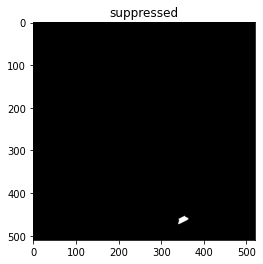

##################################################
image 11 has 1 circles
center has coordinate (247,247), radius = 228


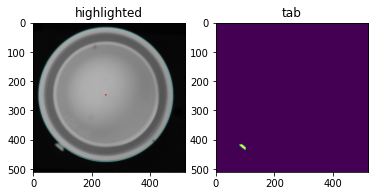

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   204  64.426407     415      79     435     102        460          224   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          27.655635           9.830285      0.934694      1    20.346872   

   rectangularity  
0        0.443478  
label 1.0
best blob has label 1.0


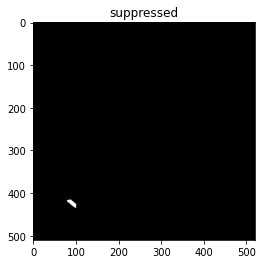

##################################################
image 12 has 1 circles
center has coordinate (255,245), radius = 227


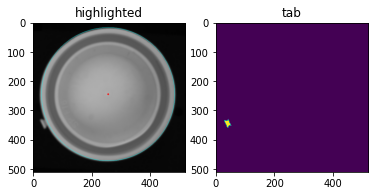

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   310  84.047727     330      28     359      52        696          397   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          26.425362           17.01893      0.764994      1    22.787163   

   rectangularity  
0        0.445402  
label 1.0
best blob has label 1.0


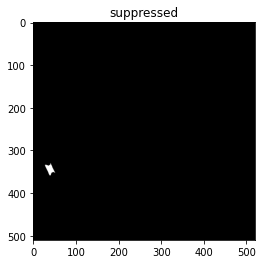

##################################################
image 13 has 1 circles
center has coordinate (259,245), radius = 232


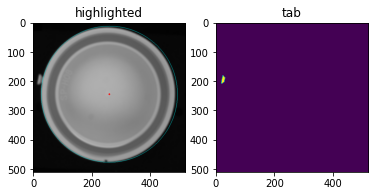

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   217  66.455844     181      18     209      31        364          237   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          27.449849          10.779509      0.919667      1    20.351978   

   rectangularity  
0        0.596154  
label 1.0
best blob has label 1.0


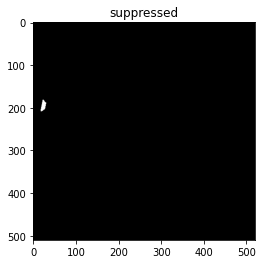

##################################################
image 14 has 1 circles
center has coordinate (255,247), radius = 228


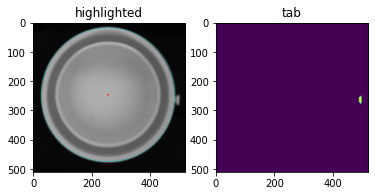

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   206  64.970563     251     485     279     495        280          223   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0           27.43169          10.134159      0.929258      1    20.491136   

   rectangularity  
0        0.735714  
label 1.0
best blob has label 1.0


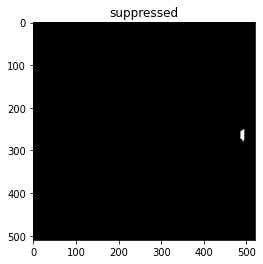

##################################################
image 15 has 1 circles
center has coordinate (253,247), radius = 229


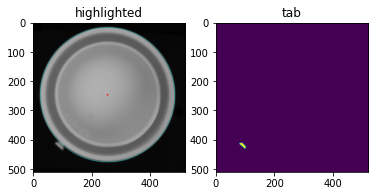

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   206  63.254834     410      79     431     101        462          217   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          28.178225            9.73522      0.938423      1    19.423175   

   rectangularity  
0        0.445887  
label 1.0
best blob has label 1.0


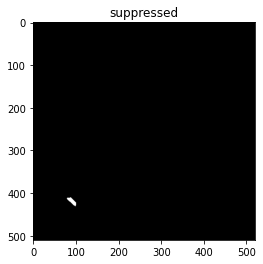

##################################################
image 16 has 1 circles
center has coordinate (253,249), radius = 228


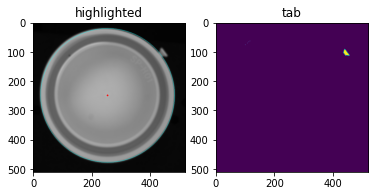

labels =[0 1 2 3 4 5]
There are 6 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
4   235  68.426407      92     432     115     453        483          263   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
4          25.755727          12.766754      0.868502      5    19.924141   

   rectangularity  
4        0.486542  
label 5.0
best blob has label 5.0


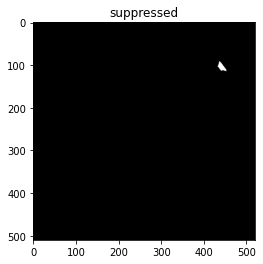

##################################################
image 17 has 1 circles
center has coordinate (249,245), radius = 226


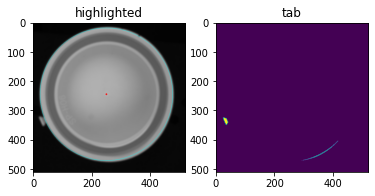

labels =[0 1 2 3 4 5 6 7]
There are 8 blob/s
   area   perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   221   66.526912     325      24     350      41        425          243   
1   167  172.662951     404     313     466     415       6324          820   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          26.267041          11.397943      0.900949      1    20.026380   
1         121.938467           8.996475      0.997275      2   178.517932   

   rectangularity  
0        0.520000  
1        0.026407  
label 1.0
best blob has label 1.0


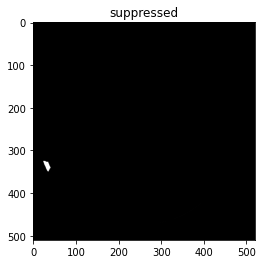

##################################################
image 18 has 1 circles
center has coordinate (249,245), radius = 227


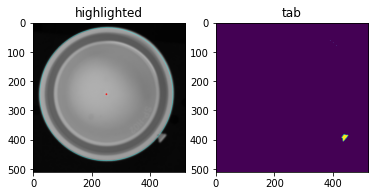

labels =[0 1 2 3 4]
There are 5 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
3   278  71.254834     381     427     406     449        550          312   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
3          24.582716          15.961693      0.760528      4    18.263494   

   rectangularity  
3        0.505455  
label 4.0
best blob has label 4.0


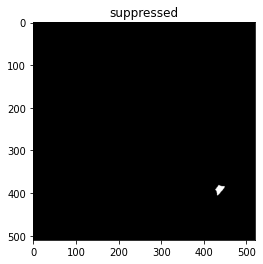

##################################################
image 19 has 1 circles
center has coordinate (253,249), radius = 229


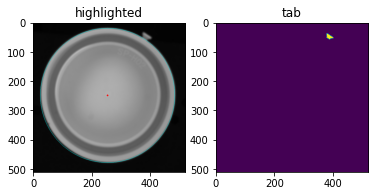

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   254  69.355339      39     376      59     399        460          280   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          24.833154          14.507337      0.811615      1     18.93765   

   rectangularity  
0        0.552174  
label 1.0
best blob has label 1.0


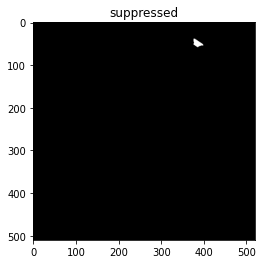

##################################################
image 20 has 1 circles
center has coordinate (249,247), radius = 230


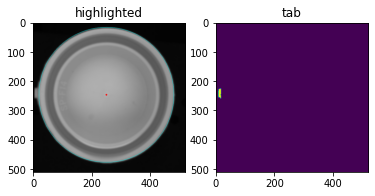

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   260  78.142136     226       8     260      17        306          275   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          34.739803          10.055952      0.957189      1    23.485359   

   rectangularity  
0        0.849673  
label 1.0
best blob has label 1.0


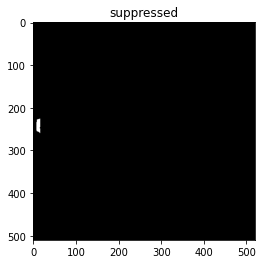

##################################################
image 21 has 1 circles
center has coordinate (255,243), radius = 229


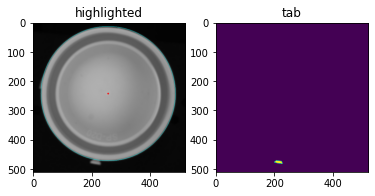

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   213  67.213203     470     198     482     226        336          236   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          28.719463           9.901764      0.938685      1    21.209459   

   rectangularity  
0        0.633929  
label 1.0
best blob has label 1.0


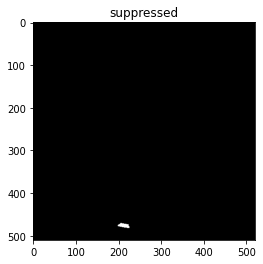

##################################################
image 22 has 1 circles
center has coordinate (257,249), radius = 227


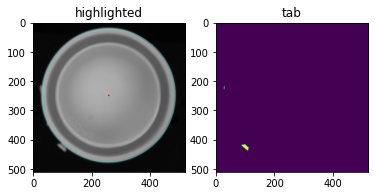

labels =[0 1 2]
There are 3 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
1   257  70.083261     415      87     437     112        550          281   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
1          28.433356          12.241661      0.902572      2    19.111531   

   rectangularity  
1        0.467273  
label 2.0
best blob has label 2.0


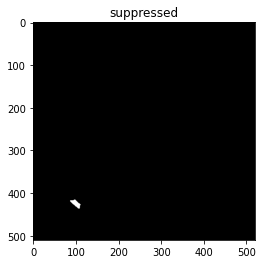

##################################################
image 23 has 1 circles
center has coordinate (251,249), radius = 228


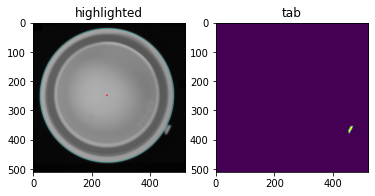

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   190  65.526912     353     449     378     466        425          215   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          27.990652           9.077248      0.945956      1    22.598822   

   rectangularity  
0        0.447059  
label 1.0
best blob has label 1.0


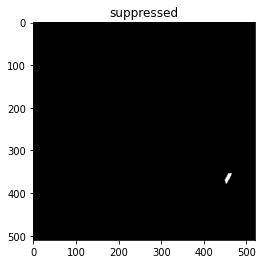

##################################################
image 24 has 1 circles
center has coordinate (261,247), radius = 228


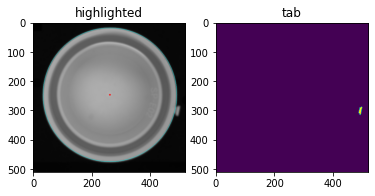

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   197  67.041631     288     484     316     497        364          224   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          28.669638           9.262788      0.946369      1    22.815128   

   rectangularity  
0        0.541209  
label 1.0
best blob has label 1.0


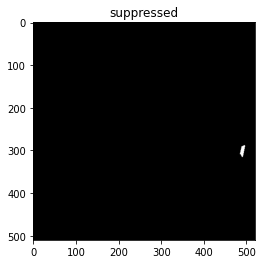

##################################################
image 25 has 1 circles
center has coordinate (251,249), radius = 227


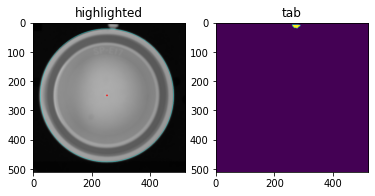

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   242  66.627417       9     259      21     287        336          258   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0           27.01414          12.246072      0.891347      1    18.343854   

   rectangularity  
0        0.720238  
label 1.0
best blob has label 1.0


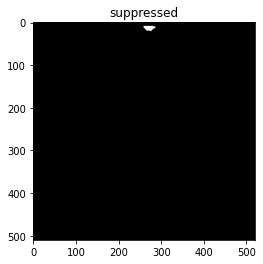

##################################################
image 26 has 1 circles
center has coordinate (253,247), radius = 226


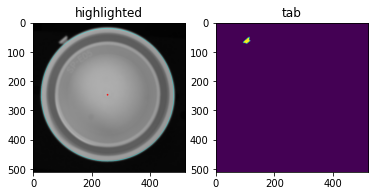

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   275  73.083261      51      92      74     117        575          315   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          26.383432          14.768533      0.828651      1    19.422411   

   rectangularity  
0        0.478261  
label 1.0
best blob has label 1.0


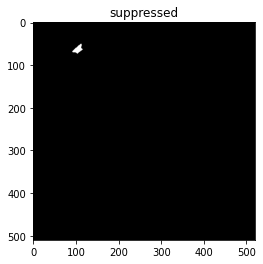

##################################################
image 27 has 1 circles
center has coordinate (253,249), radius = 228


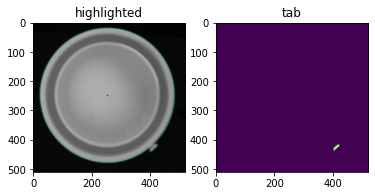

labels =[0 1]
There are 2 blob/s
   area  perimeter  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  \
0   192  63.254834     416     399     437     420        441          209   

   major_axis_length  minor_axis_length  eccentricity  label  compactness  \
0          28.224557           8.960987      0.948262      1    20.839448   

   rectangularity  
0        0.435374  
label 1.0
best blob has label 1.0


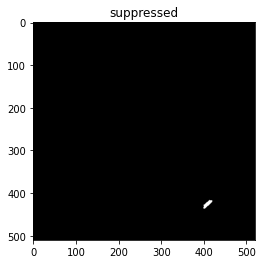

##################################################


In [18]:
from skimage import measure
from skimage.measure import label, regionprops, regionprops_table

tabs = list()
rotated_images= list()
centers = list()
for i in range(0,len(cb_images)):
    focus = cb_images[i].copy()
    original = cropped_images[i].copy
    circles = find_best_circle(focus)
    print("image {} has {} circles".format(i,len(circles)))
    fig = plt.figure()

    plt.subplot(2,2,1)
    highlighted = cropped_images[i]
    tab = cv2.cvtColor(focus,cv2.COLOR_BGR2GRAY).copy()
    
    for (x,y,r) in  circles:
        x_center = x
        y_center = y
        centers.append((x,y,r))
        print("center has coordinate ({},{}), radius = {}".format(x,y,r))
        highlighted = cv2.circle(focus,(x,y),r,(0,255,255),1)
        highlighted = cv2.circle(highlighted,(x,y),1,(255,0,0),3) # adding the centre of the circle
        tab = cv2.circle(tab,(x,y),r,(0,0,0),-1)


    opened = cv2.blur(tab,(5,5))
    
    opened = cv2.threshold(tab,70,255, type = cv2.THRESH_BINARY,)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    opened= cv2.morphologyEx(opened, cv2.MORPH_OPEN,kernel,-1)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
    opened = cv2.morphologyEx(opened,cv2.MORPH_ERODE,kernel,-1)
    
    # kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    # opened = cv2.morphologyEx(opened,cv2.MORPH_CLOSE,kernel,-1)


    plt.subplot(1,2,1)
    plt.imshow(highlighted)
    plt.title("highlighted")
    plt.subplot(1,2,2)
    plt.imshow(opened)
    plt.title("tab")
    plt.show()

    labels = measure.label(opened)
    
    print("labels ={}".format(np.unique(labels)))# never decomment this 
    print("There are {} blob/s".format(len(np.unique(labels))))

    properties =['area','perimeter','bbox','bbox_area',
                'convex_area',
            'major_axis_length', 'minor_axis_length',
            'eccentricity','label'
            ]
    df = pd.DataFrame(regionprops_table(labels, properties = properties))
    df["compactness"]= df["perimeter"]**2/df["area"]
    df["rectangularity"] = df["area"]/df["bbox_area"]
        
    if len(np.unique(labels))>=2:
        df= df[df["area"]>=20]
        df= df[df["area"]<=500]
        df=df.sort_values(["compactness","area",'rectangularity'], ascending=[True,False,True])
        print(df.head(len(np.unique(labels))));
        # print()
        best =df.iloc[0]['label']
        print("label {}".format(best)) 
        print("best blob has label {}".format(best))
        # minr, minc, maxr, maxc = df.iloc[0]["bbox-0"],df.iloc[0]["bbox-1"],df.iloc[0]["bbox-2"],df.iloc[0]["bbox-3"]
       
        
        # labels[labels!=best]=0
        labels[labels==best]=255
        # cv2.rectangle(tab, (minr,minc),(maxr,maxc),(255,0,0),1)
        plt.imshow(labels,cmap="gray")
        # plt.add_patch(rect)
        plt.title("suppressed")
        plt.show()

    #     area = df["area"][best]
    #     # opened= labels.copy()
    # area = df.iloc[0]["area"]



    print("##################################################")